In [1]:
import h5py
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

from reproducibility.utils import data_sample, data_preprocess, set_seed
from scace import run_scace

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 # set global dpi

2023-12-07 11:26:09.616180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Preprocessing

In [2]:
####################################  Read dataset  ####################################
# This data could be downloaded from https://drive.google.com/drive/folders/1c33An3HNdJQhazoy_ky9E-lCc3a4y7fl
data_mat = h5py.File('/Users/jiayi_liu/Desktop/scAce-notes/reproducibility/data/Human_PBMC.h5')
x, y = np.array(data_mat['X']), np.array(data_mat['Y'])
data_mat.close()

####################################  Run without sampling  ####################################

seed = 2023
set_seed(seed)

adata = sc.AnnData(x)
adata.obs['celltype'] = y

adata = data_preprocess(adata)

In [3]:
adata

AnnData object with n_obs × n_vars = 4271 × 16486
    obs: 'celltype', 'n_genes', 'n_counts', 'scale_factor'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

## Run scAce

In default mode, function `run_scace` would return an AnnData object with embedding and clustering result stored in `adata.obsm['scace_emb']` and `adata.obs['scace_cluster']`

In [6]:
# adata = run_scace(adata)

If return_all is True, function `run_scace` would print and return all temporate results:

- K: Final number of clusters.
- pred_all: All temporary clustering results.
- emb_all: All temporary embedding.


In [7]:
# adata, K, pred_all, emb_all, run_time = run_scace(adata, return_all=True)

If the key of grount truth cell type (i.e. `cl_type`) is also provided, ARI and NMI will also be returned.

In [4]:
adata, nmi, ari, K, pred_all, emb_all, run_time = run_scace(
    adata,
    cl_type='celltype',
    return_all=True,
    pretrained_ckpt='/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_hpbmc.pth'
)

Pre-trained model provided, load checkpoint from file "/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_hpbmc.pth".
Perform initial clustering through leiden with resolution = 2
Finish initial clustering! Number of initial clusters is 21
Initial Clustering: NMI= 0.6674, ARI= 0.3799
Start training! Total epochs is 500.


Training::   0%|                                     | 0/500 [00:00<?, ?epoch/s]

Train epoch [1/500]. ZINB loss:0.2400, kld loss:7.1513, cluster loss:0.7469, total loss:1.0585


Training::   0%|                           | 1/500 [00:40<5:37:59, 40.64s/epoch]

Clustering   1: NMI= 0.7364, ARI= 0.6402, Delta=0.1480
Train epoch [2/500]. ZINB loss:0.2398, kld loss:14.3835, cluster loss:0.4757, total loss:0.8594


Training::   0%|                           | 2/500 [01:24<5:53:42, 42.62s/epoch]

Clustering   2: NMI= 0.7396, ARI= 0.6660, Delta=0.3079
Train epoch [3/500]. ZINB loss:0.2392, kld loss:17.5102, cluster loss:0.4642, total loss:0.8785


Training::   1%|▏                          | 3/500 [02:11<6:10:13, 44.70s/epoch]

Clustering   3: NMI= 0.7380, ARI= 0.6832, Delta=0.0700
Train epoch [4/500]. ZINB loss:0.2387, kld loss:22.2420, cluster loss:0.4718, total loss:0.9329


Training::   1%|▏                          | 4/500 [02:54<6:02:07, 43.81s/epoch]

Clustering   4: NMI= 0.7365, ARI= 0.6964, Delta=0.0897
Train epoch [5/500]. ZINB loss:0.2383, kld loss:26.4825, cluster loss:0.4575, total loss:0.9606


Training::   1%|▎                          | 5/500 [03:29<5:36:09, 40.75s/epoch]

Clustering   5: NMI= 0.7370, ARI= 0.7051, Delta=0.0918
Train epoch [6/500]. ZINB loss:0.2378, kld loss:29.7346, cluster loss:0.4508, total loss:0.9860


Training::   1%|▎                          | 6/500 [04:10<5:36:15, 40.84s/epoch]

Clustering   6: NMI= 0.7322, ARI= 0.7041, Delta=0.0829
Train epoch [7/500]. ZINB loss:0.2379, kld loss:31.7514, cluster loss:0.4513, total loss:1.0067


Training::   1%|▍                          | 7/500 [04:51<5:36:44, 40.98s/epoch]

Clustering   7: NMI= 0.7385, ARI= 0.7344, Delta=0.0815
Train epoch [8/500]. ZINB loss:0.2378, kld loss:33.2551, cluster loss:0.4478, total loss:1.0182


Training::   2%|▍                          | 8/500 [05:27<5:21:04, 39.16s/epoch]

Clustering   8: NMI= 0.7460, ARI= 0.7509, Delta=0.0869
Train epoch [9/500]. ZINB loss:0.2377, kld loss:34.1978, cluster loss:0.4527, total loss:1.0323


Training::   2%|▍                          | 9/500 [06:04<5:14:50, 38.47s/epoch]

Clustering   9: NMI= 0.7437, ARI= 0.7484, Delta=0.0667
Train epoch [10/500]. ZINB loss:0.2377, kld loss:35.0583, cluster loss:0.4494, total loss:1.0377


Training::   2%|▌                         | 10/500 [06:46<5:24:10, 39.69s/epoch]

Clustering   10: NMI= 0.7429, ARI= 0.7461, Delta=0.0707
Train epoch [11/500]. ZINB loss:0.2375, kld loss:35.6684, cluster loss:0.4550, total loss:1.0492


Training::   2%|▌                         | 11/500 [07:21<5:12:46, 38.38s/epoch]

Clustering   11: NMI= 0.7448, ARI= 0.7504, Delta=0.0611
Train epoch [12/500]. ZINB loss:0.2377, kld loss:36.3879, cluster loss:0.4531, total loss:1.0547


Training::   2%|▌                         | 12/500 [07:58<5:07:58, 37.87s/epoch]

Clustering   12: NMI= 0.7475, ARI= 0.7539, Delta=0.0588
Train epoch [13/500]. ZINB loss:0.2375, kld loss:36.8017, cluster loss:0.4511, total loss:1.0567


Training::   3%|▋                         | 13/500 [08:40<5:17:20, 39.10s/epoch]

Clustering   13: NMI= 0.7507, ARI= 0.7588, Delta=0.0546
Train epoch [14/500]. ZINB loss:0.2376, kld loss:37.0722, cluster loss:0.4537, total loss:1.0620


Training::   3%|▋                         | 14/500 [09:30<5:44:27, 42.52s/epoch]

Clustering   14: NMI= 0.7524, ARI= 0.7607, Delta=0.0555
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 20
count_true: 190
count: 135
-----------------iter: 2-----------------
n_clusters: 19
count_true: 171
count: 119
-----------------iter: 3-----------------
n_clusters: 18
count_true: 153
count: 115
-----------------iter: 4-----------------
n_clusters: 17
count_true: 136
count: 109
-----------------iter: 5-----------------
n_clusters: 16
count_true: 120
count: 98
-----------------iter: 6-----------------
n_clusters: 15
count_true: 105
count: 85
-----------------iter: 7-----------------
n_clusters: 14
count_true: 91
count: 74
-----------------iter: 8-----------------
n_clusters: 13
count_true: 78
count: 61
-----------------iter: 9-----------------
n_clusters: 12
count_true: 66
count: 60
-----------------iter: 10-----------------
n_clusters: 11
count_true: 55
count: 50
-----------------iter: 11-----------------
n_clusters: 10
cou

Training::   3%|▊                         | 15/500 [10:12<5:40:43, 42.15s/epoch]

Clustering   15: NMI= 0.8134, ARI= 0.7991, Delta=0.0478
Train epoch [16/500]. ZINB loss:0.2376, kld loss:41.2885, cluster loss:0.3928, total loss:1.0433


Training::   3%|▊                         | 16/500 [10:50<5:30:04, 40.92s/epoch]

Clustering   16: NMI= 0.8145, ARI= 0.7997, Delta=0.9183
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 7
count_true: 21
count: 15
-----------------iter: 2-----------------
n_clusters: 6
count_true: 15
count: 15
Reach count!
Train epoch [17/500]. ZINB loss:0.2378, kld loss:39.6578, cluster loss:0.3365, total loss:0.9709


Training::   3%|▉                         | 17/500 [11:26<5:17:53, 39.49s/epoch]

Clustering   17: NMI= 0.8083, ARI= 0.7813, Delta=0.0005
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 6
count_true: 15
count: 15
Reach count!
Stop merging clusters! Continue updating several rounds.
Train epoch [18/500]. ZINB loss:0.2380, kld loss:37.7233, cluster loss:0.3580, total loss:0.9732


Training::   4%|▉                         | 18/500 [12:09<5:25:31, 40.52s/epoch]

Clustering   18: NMI= 0.8105, ARI= 0.7823, Delta=0.0323
Reach tolerance threshold. Stopping training.
Total time: 744.1683032512665 seconds


In [5]:
print("ARI = {}, NMI = {}".format(ari, nmi))

ARI = 0.78227, NMI = 0.81053


## Visualization

### Show final clustering results

In [6]:
# Use embedding `scace_emb` to perfrom U-map
sc.pp.neighbors(adata, use_rep='scace_emb')
sc.tl.umap(adata)

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


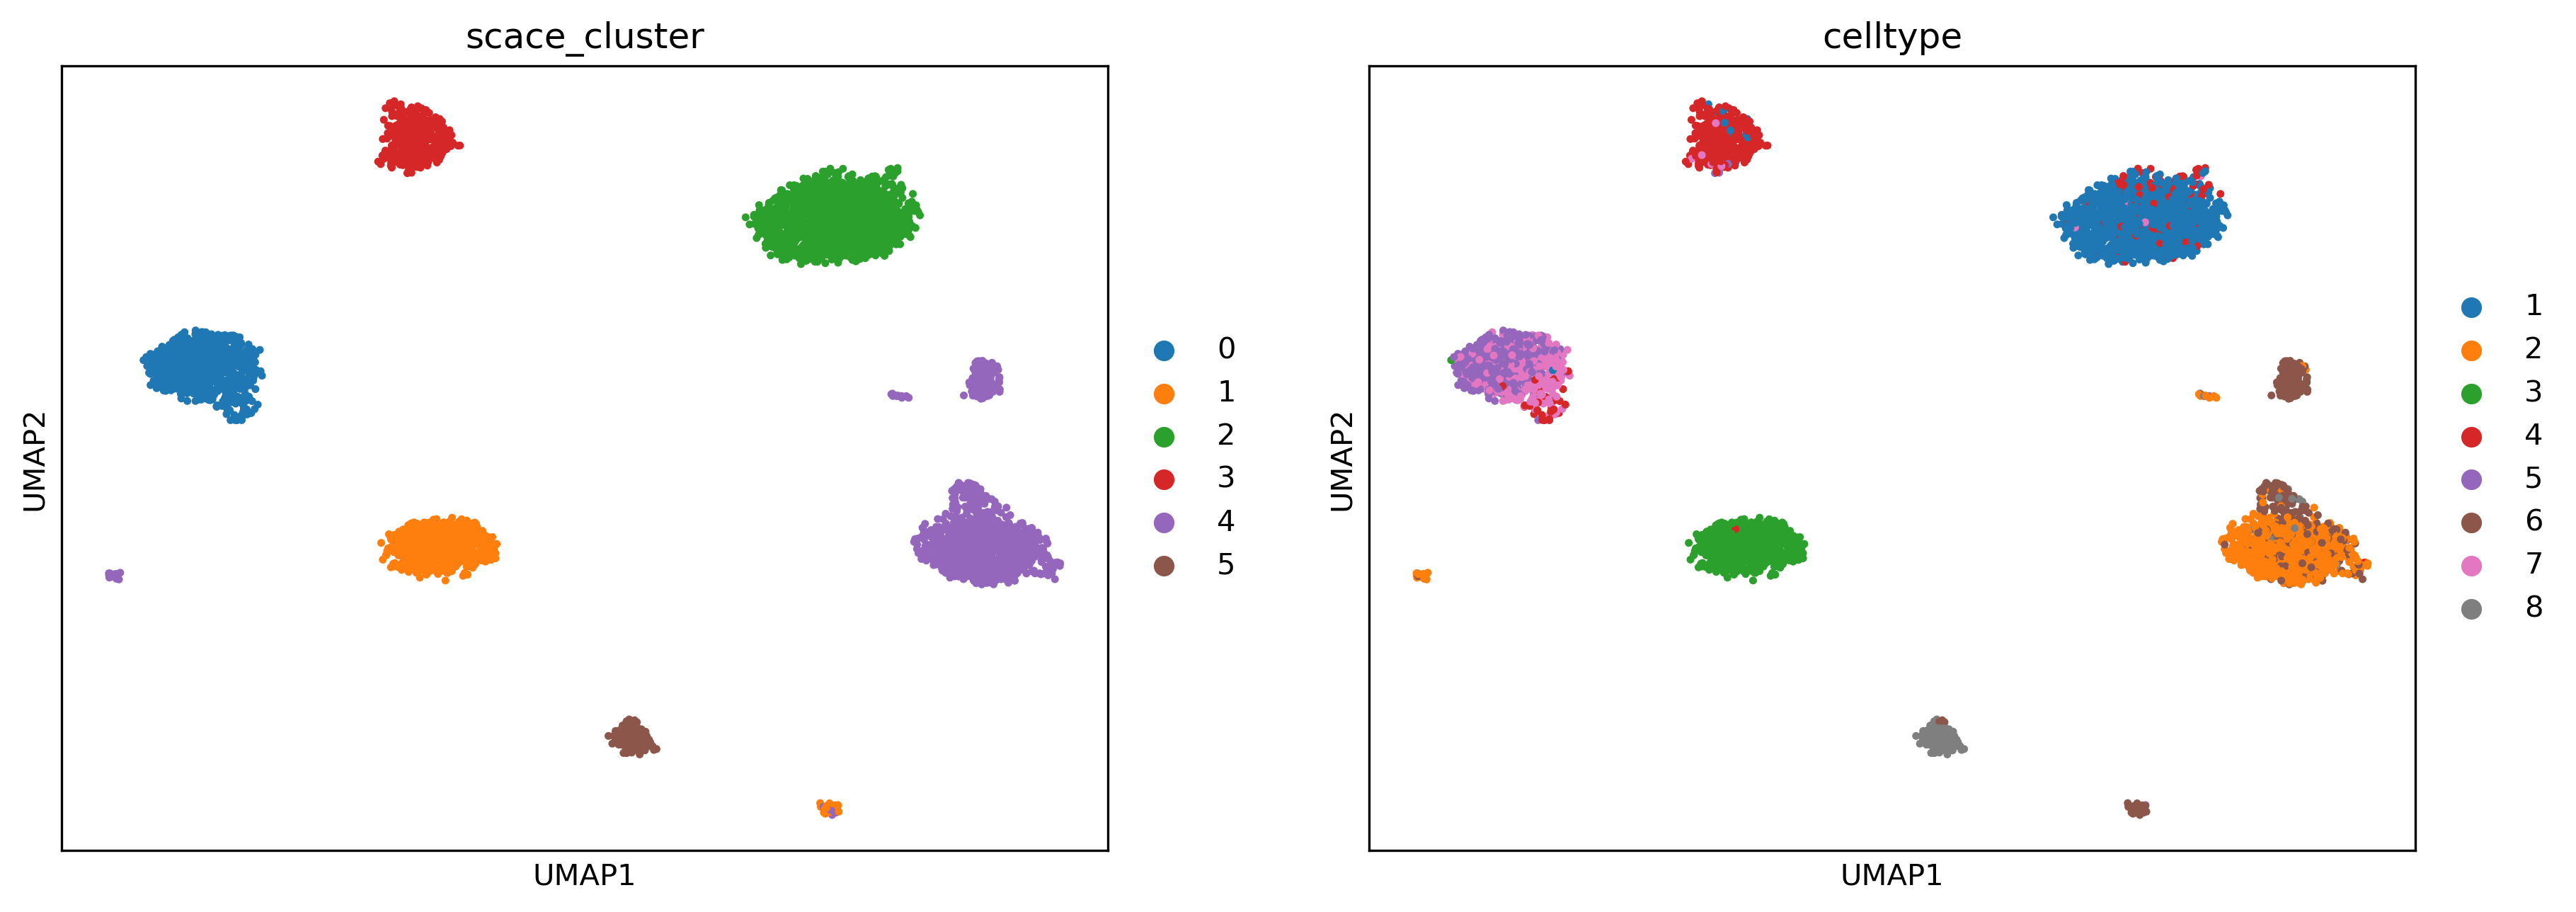

In [7]:
adata.obs['celltype'] = adata.obs['celltype'].astype(int).astype('category')
adata.obs['scace_cluster'] = adata.obs['scace_cluster'].astype(int).astype('category')
sc.pl.umap(adata, color=['scace_cluster', 'celltype'])

### Show initial clustering results

In [8]:
# emb_all[0] is the embedding after pre-training
# pred_all[0] is the initial clustering result after pre-training

adata_tmp = sc.AnnData(emb_all[0])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_cluster'] = pred_all[0]
adata_tmp.obs['scace_cluster'] = adata_tmp.obs['scace_cluster'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


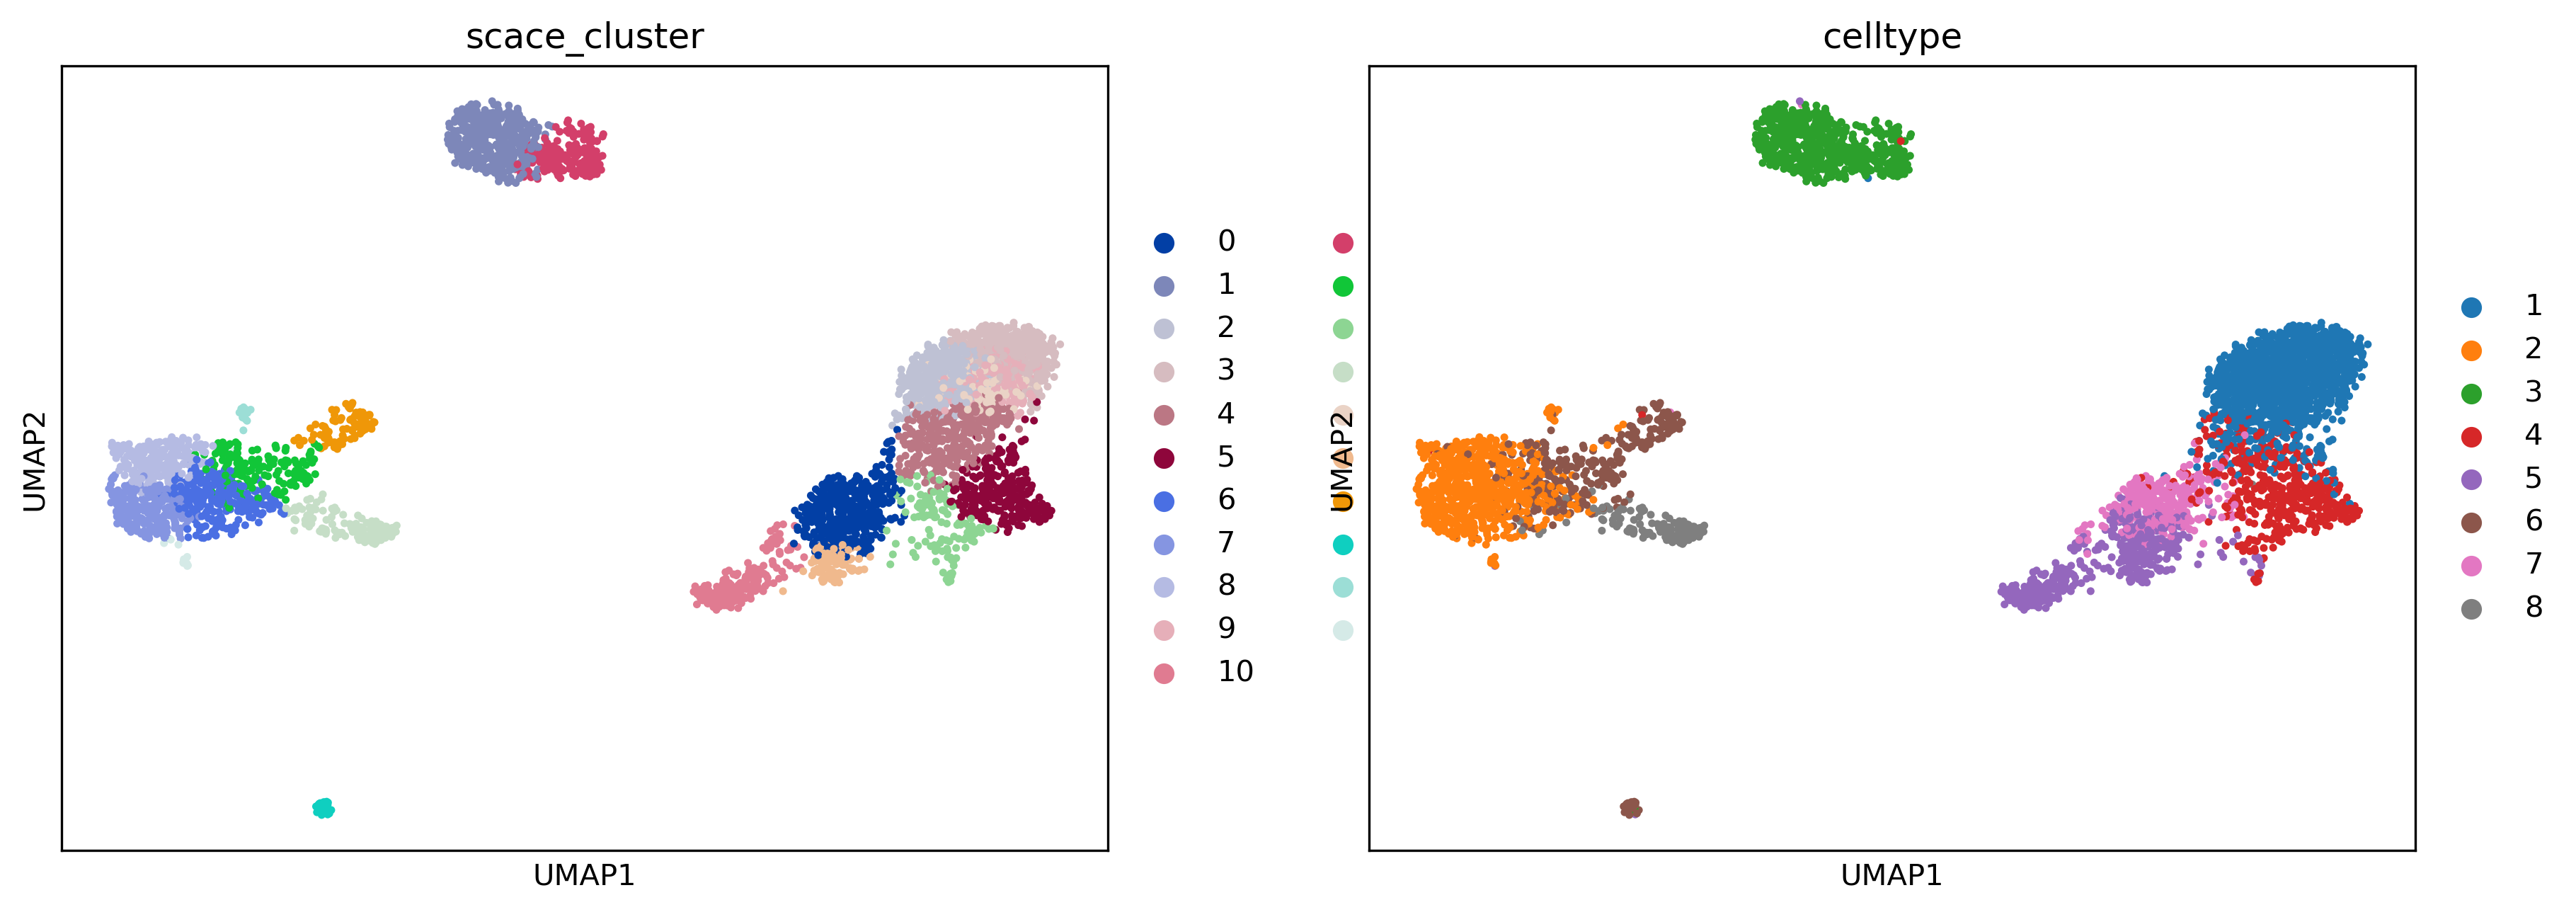

In [9]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_cluster', 'celltype'])

### Show clustering results before and after cluster merging

For the first time

In [10]:
# emb_all[1] is the embedding of the first cluster merging.
# pred_all[1] is the all clustering results from the first cluster merging, where
# pred_all[1][0] is the clustering result before cluster merging, and
# pred_all[1][0] is the clustering result after cluster merging.

adata_tmp = sc.AnnData(emb_all[1])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[1][0], pred_all[1][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


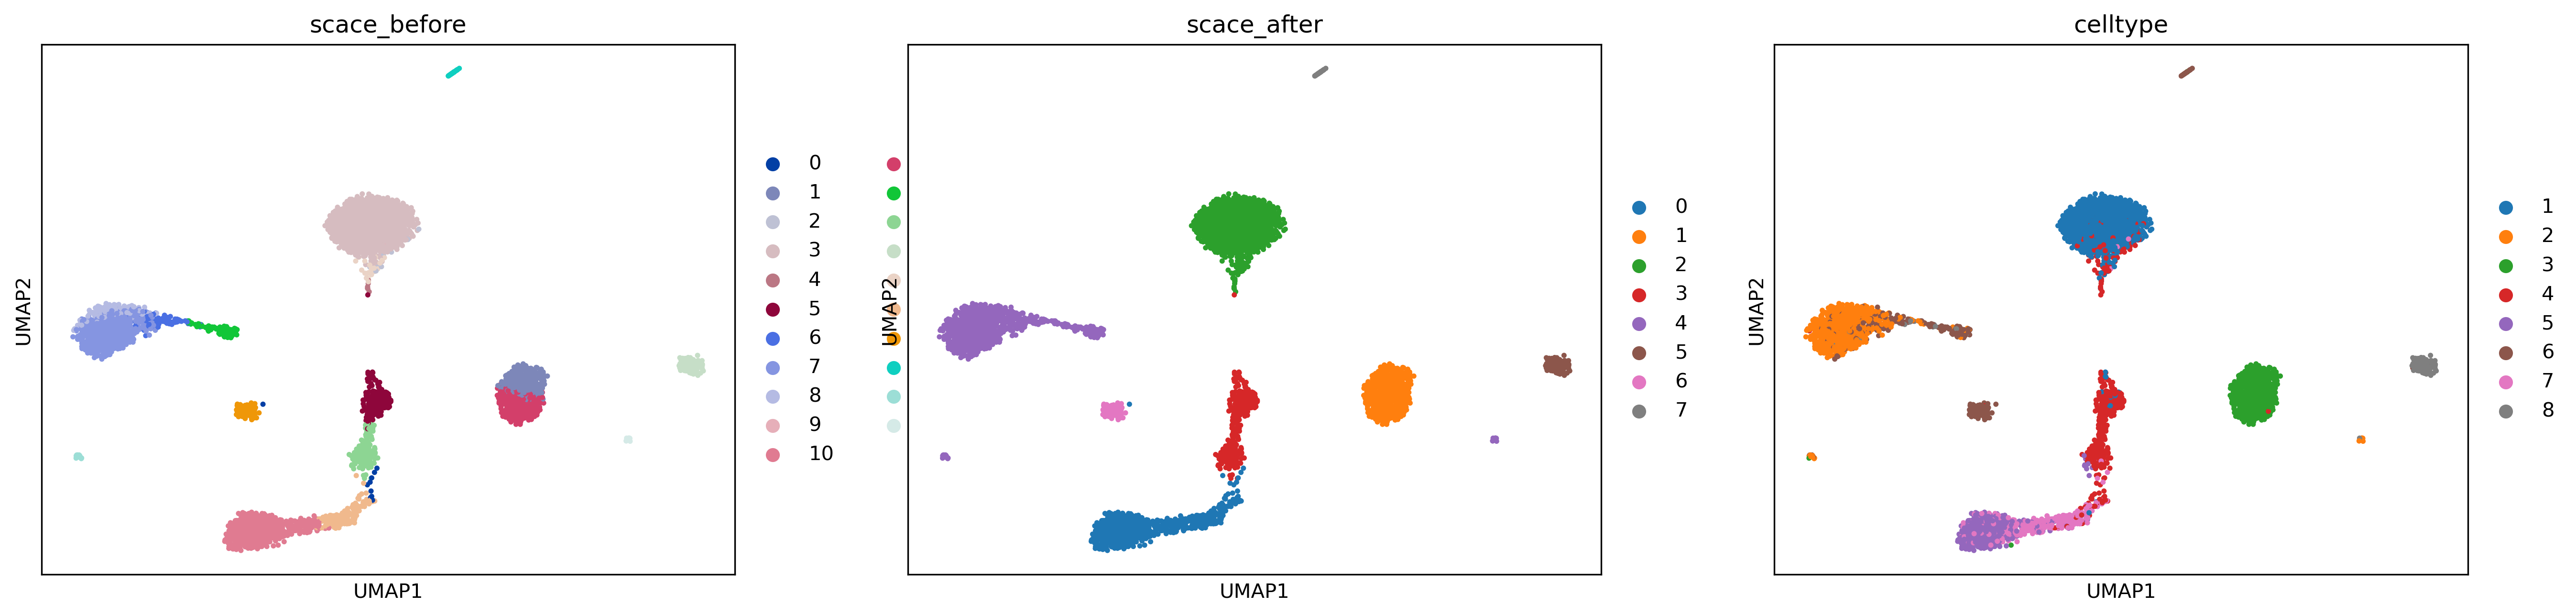

In [11]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

For the final time

In [12]:
adata_tmp = sc.AnnData(emb_all[-2])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[2][0], pred_all[2][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


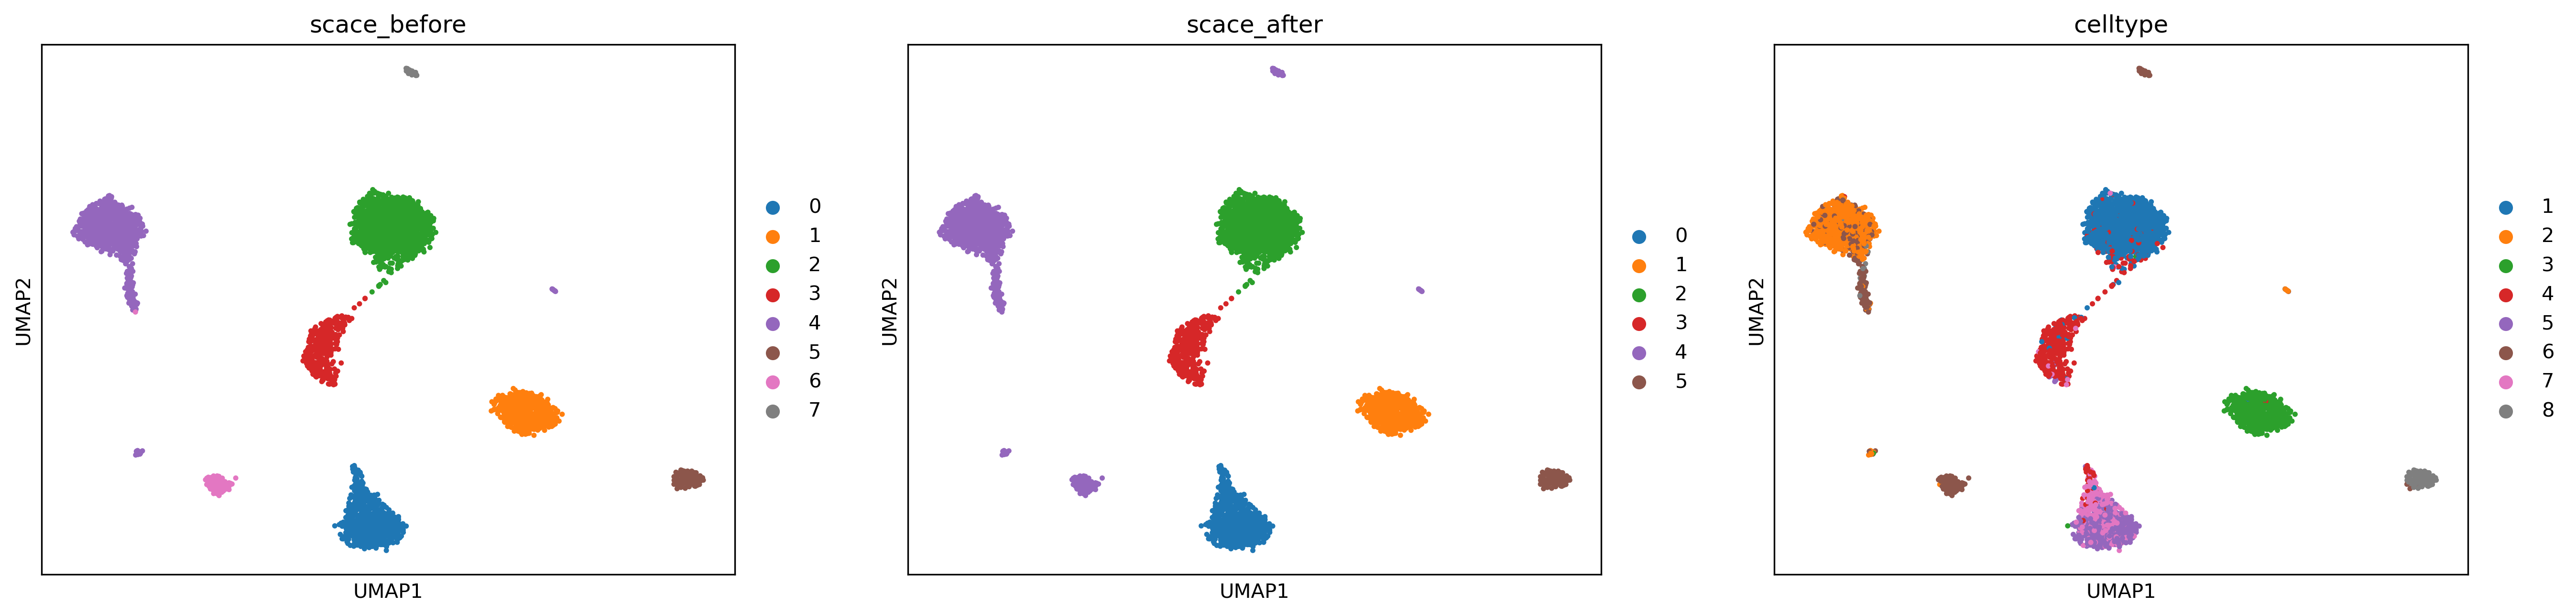

In [13]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])